In [1]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_diabetes
from synthcity.plugins import Plugins

eval_plugin = "adsgan"

In [2]:
# Load dataset
X, y = load_diabetes(return_X_y=True, as_frame=True)
X["target"] = y

X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [3]:
# Train the generator
from synthcity.plugins import Plugins

syn_model = Plugins().get(eval_plugin)

syn_model.fit(X)

In [4]:
# Generate new samples

syn_model.generate(count = 10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,-0.030465,-0.044642,-0.003911,0.035375,-0.006211,0.013167,-0.025553,0.044785,-0.085365,-0.011165,312.399002
1,-0.000024,0.050680,-0.025116,0.055926,0.018316,-0.004707,-0.028632,-0.001441,-0.029892,0.026348,235.883254
2,0.038268,0.050680,-0.017696,0.063753,0.008283,-0.034662,0.035107,-0.049470,-0.010108,-0.007171,107.616214
3,-0.045421,-0.044642,-0.037811,-0.018909,-0.003443,-0.095076,0.077928,-0.046580,-0.099503,-0.048969,59.541900
4,0.068232,0.050680,-0.004372,-0.022378,0.128219,0.019752,0.061721,-0.007984,-0.070363,0.027634,269.660267
5,0.030479,0.050680,0.038776,0.054290,0.000936,-0.061206,-0.017112,-0.004596,-0.109843,0.021315,270.584561
6,-0.007634,0.050680,-0.032213,0.110384,-0.058850,-0.045572,-0.018232,0.025071,-0.036290,-0.008888,190.613717
7,-0.049194,0.050680,0.003511,0.059633,-0.013644,0.094369,-0.045440,0.096590,-0.033088,0.018958,178.236254
8,0.022784,0.050680,-0.036798,0.023323,-0.027650,-0.031354,-0.012605,0.021647,0.001671,-0.003518,35.216957
9,0.030709,0.050680,0.009478,0.056370,0.019431,0.021774,-0.030384,0.046392,-0.051093,0.037102,269.873071


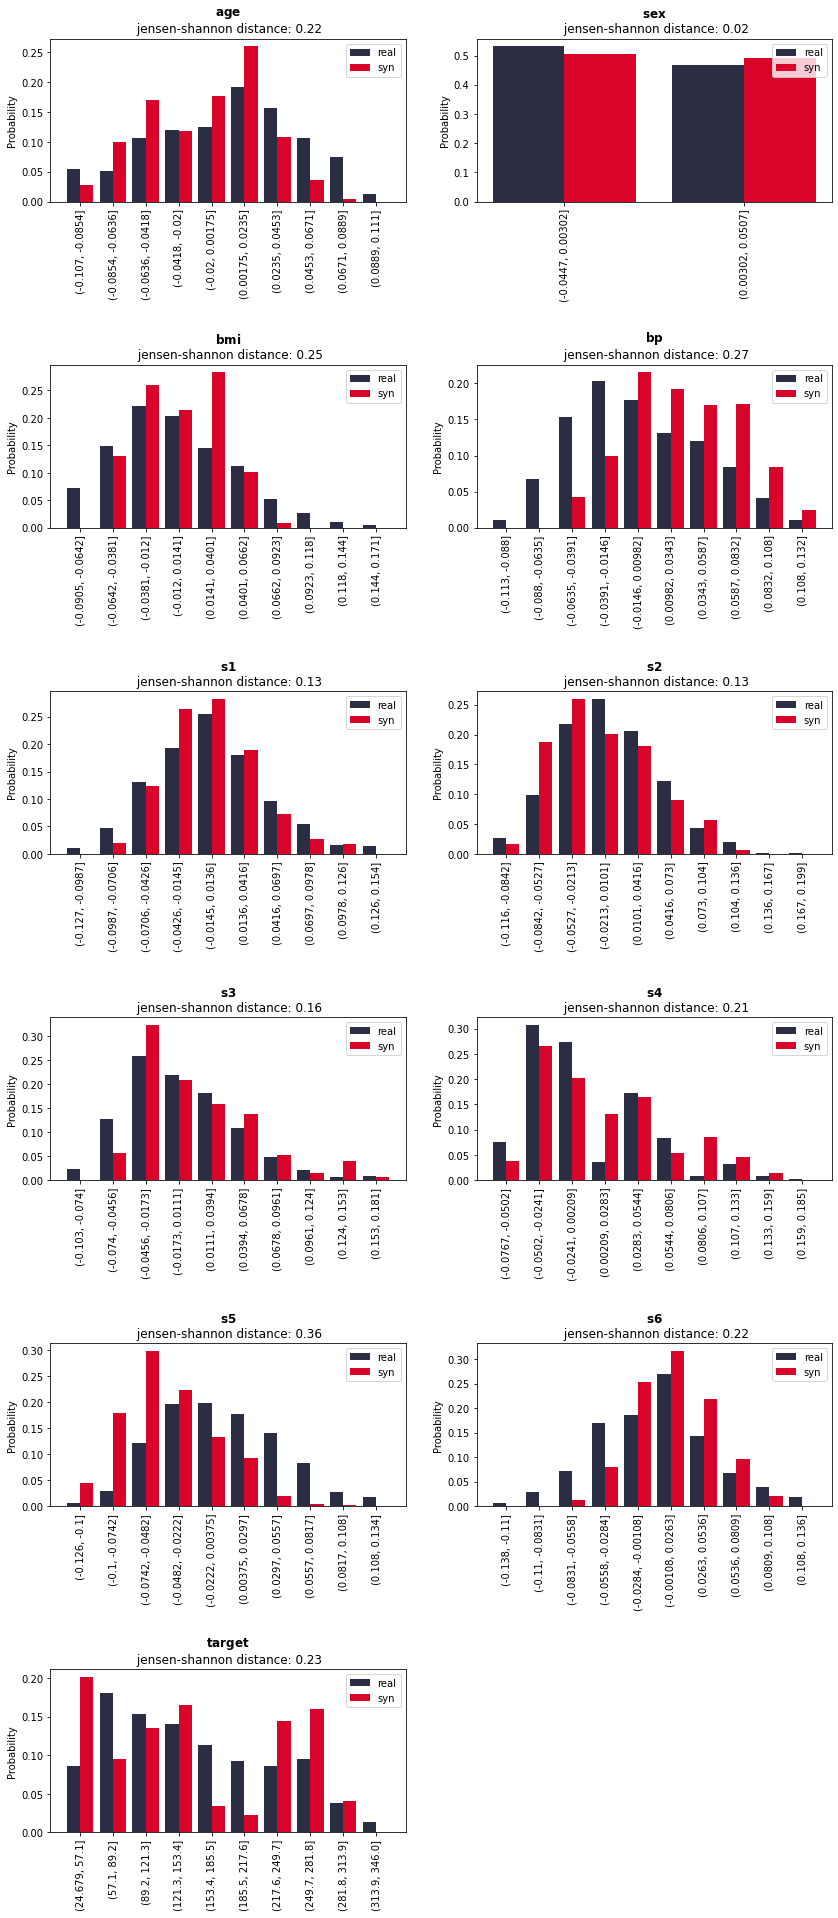

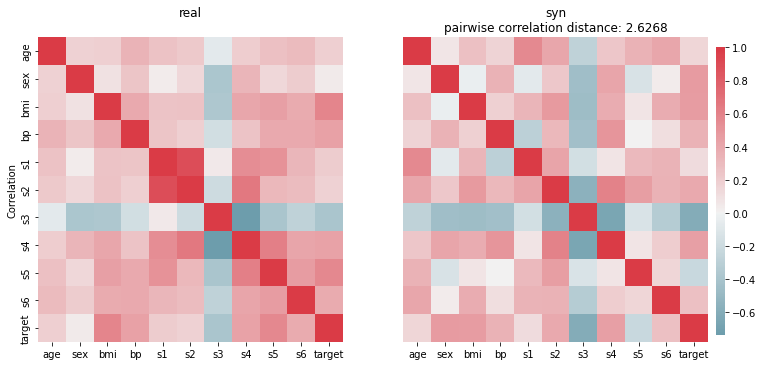

In [5]:
import matplotlib.pyplot as plt

syn_model.plot(plt, X)

plt.show()

In [6]:
# Benchmark
from synthcity.benchmark import Benchmarks

score = Benchmarks.evaluate(
    [eval_plugin],
    X,
    sensitive_columns = ["sex"],
    repeats = 3,
)

In [7]:
Benchmarks.print(score)


Plugin : adsgan


,min,max,mean,stddev,median,iqr,rounds,errors,durations
sanity.data_mismatch_score,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,0,0.00
sanity.common_rows_proportion,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,0,0.01
sanity.nearest_syn_neighbor_distance,0.024887,0.057650,0.040233,0.013455,0.038161,0.016381,3,0,0.01
sanity.inlier_probability,0.891403,0.986425,0.943439,0.039317,0.952489,0.047511,3,0,0.01
sanity.outlier_probability,0.002262,0.009050,0.005279,0.002822,0.004525,0.003394,3,0,0.01
statistical.marginal.jensenshannon_distance,0.187507,0.233102,0.205511,0.019810,0.195923,0.022798,3,0,0.17
statistical.marginal.chi_squared_test,0.081234,0.544129,0.358979,0.199997,0.451573,0.231447,3,0,0.03
statistical.joint.feature_correlation,1.824258,3.709380,2.598180,0.805704,2.260903,0.942561,3,0,0.12
statistical.marginal.inverse_cdf_distance,0.169595,0.209664,0.184255,0.018038,0.173506,0.020034,3,0,3.44
statistical.marginal.inverse_kl_divergence,0.566690,0.758402,0.674202,0.079983,0.697513,0.095856,3,0,0.01
